In [52]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chardet
import plotly_express as px


""" MOBILITY AND TRANSPORT"""
dataset_path_mat = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv'
with open(dataset_path_mat, 'rb') as rawdata:

    result = chardet.detect(rawdata.read(100000))

dataset_path_wfh1 = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Werkzame_beroepsbevolking__thuiswerken_04102024_193141.csv'
dataset_path_wfh2 = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Werkzame_beroepsbevolking__thuiswerken_07102024_101921.csv'
df_mat_path = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv'

df_wfh1 = pd.read_csv(dataset_path_wfh1, delimiter=";", encoding="UTF-8-SIG")
df_wfh2 = pd.read_csv(dataset_path_wfh2, delimiter=";", encoding="UTF-8-SIG")
df_mat = pd.read_csv(df_mat_path, delimiter=";", encoding="UTF-8-SIG")
    
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [53]:

df_wfh2.rename(columns={'Positie in de werkkring': 'Positie werkkring'}, inplace=True)
df_wfh2.rename(columns={'Thuiswerken': 'Thuiswerker'}, inplace=True)

columns = list(df_wfh2.columns)
columns.insert(1, columns.pop(columns.index('Thuiswerker')))
df_wfh2 = df_wfh2[columns]  

df_merged = pd.concat([df_wfh1,df_wfh2])

thuiswerker_mapping = {
    'Thuiswerker die gewoonlijk thuis werkt': 'Meestal thuiswerken',
    'Thuiswerker, incidenteel op vaste dagen': 'Soms thuiswerken',
    'Thuiswerker, incidenteel geen vaste dag': 'Soms thuiswerken',
    'Geen thuiswerker': 'Niet thuiswerken'
}

df_merged['Thuiswerker'] = df_merged['Thuiswerker'].replace(thuiswerker_mapping)

df_filtered = df_merged[
    (df_merged['Positie werkkring'] == 'Totaal') &
    (df_merged['Persoonskenmerken'] == 'Totaal personen') &
    (~df_merged['Thuiswerker'].isin(["Thuiswerker","Totaal","Meestal of soms thuiswerken","Thuiswerker die incidenteel thuis werkt"]))
]


df_filtered1 = df_wfh1[(df_wfh1['Thuiswerker'] == "Thuiswerker")&(df_wfh1['Positie werkkring'] == 'Totaal')&(df_wfh1['Persoonskenmerken'] == 'Totaal personen')]
df_filtered2 = df_wfh2[(df_wfh2['Thuiswerker'] == "Meestal of soms thuiswerken")&(df_wfh2['Positie werkkring'] == 'Totaal')&(df_wfh2['Persoonskenmerken'] == 'Totaal personen')]

df_wfh_line = pd.concat([df_filtered1,df_filtered2])


In [54]:
df_mod = df_mod.sort_values(['Ritten per persoon per dag (gemiddeld) (aantal)'], ascending=True)
df_mod = df_mod.sort_values(['Perioden'], ascending=True)
df_mod_total = df_mod[
    (df_mod['Geslacht'] == "Totaal mannen en vrouwen") &
    (df_mod["Leeftijd"] == "Totaal") &
    (df_mod["Vervoerwijzen"] != "Totaal")&
    (df_mod["Reismotieven"] == "Totaal")]

df_mod_total['Reismotieven'] = df_mod_total['Vervoerwijzen'].replace({
    "Auto (bestuurder)": "Car (driver)",
    "Overige vervoerwijze": "Other travel mode",
    "Auto (passagier)": "Car (passenger)",
    "Trein": "Train",
    "Lopen": "Walking"})



C:\Users\teun\AppData\Local\Temp\ipykernel_11676\760989551.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_filtered_agg_pivot = df_filtered_agg.pivot(index='Perioden', columns='Thuiswerker', values='Percentage')
df_filtered_agg_pivot = df_filtered_agg_pivot.fillna(0)
df_filtered_agg_pivot['Home_Work_Percentage'] = df_filtered_agg_pivot.get('Soms thuiswerken', 0) + df_filtered_agg_pivot.get('Meestal thuiswerken', 0)
df_filtered_agg_pivot = df_filtered_agg_pivot.reset_index()
df_filtered_agg_pivot['Perioden'] = df_filtered_agg_pivot['Perioden'].astype(str)
car_usage_data['Perioden'] = car_usage_data['Perioden'].astype(str)

merged_data_actual = pd.merge(
    df_filtered_agg_pivot[['Perioden', 'Home_Work_Percentage']], 
    car_usage_data, 
    on='Perioden', 
    how='inner'
)


Data for Auto (passagier):
Jaar 2015: Thuiswerken Percentage = 35.91%, Auto (passagier) Percentage = 11.22%
Jaar 2019: Thuiswerken Percentage = 39.09%, Auto (passagier) Percentage = 10.81%
Jaar 2020: Thuiswerken Percentage = 41.03%, Auto (passagier) Percentage = 10.08%
Jaar 2021: Thuiswerken Percentage = 53.98%, Auto (passagier) Percentage = 10.27%
Jaar 2022: Thuiswerken Percentage = 53.09%, Auto (passagier) Percentage = 10.18%
Jaar 2023: Thuiswerken Percentage = 51.95%, Auto (passagier) Percentage = 10.54%


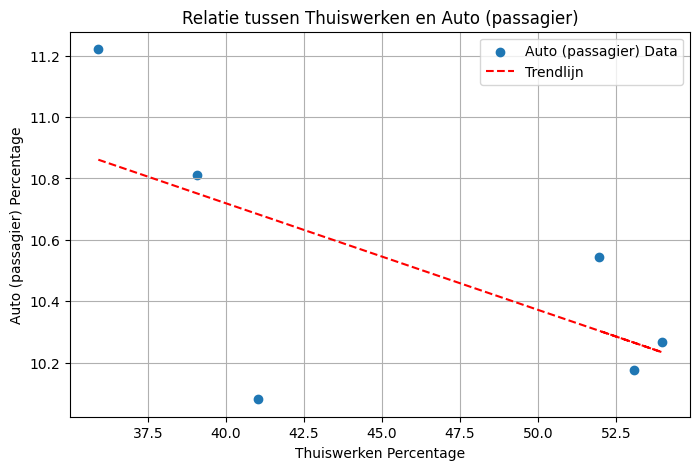


Data for Fiets:
Jaar 2015: Thuiswerken Percentage = 35.91%, Fiets Percentage = 27.72%
Jaar 2019: Thuiswerken Percentage = 39.09%, Fiets Percentage = 27.70%
Jaar 2020: Thuiswerken Percentage = 41.03%, Fiets Percentage = 26.21%
Jaar 2021: Thuiswerken Percentage = 53.98%, Fiets Percentage = 25.48%
Jaar 2022: Thuiswerken Percentage = 53.09%, Fiets Percentage = 27.37%
Jaar 2023: Thuiswerken Percentage = 51.95%, Fiets Percentage = 26.53%


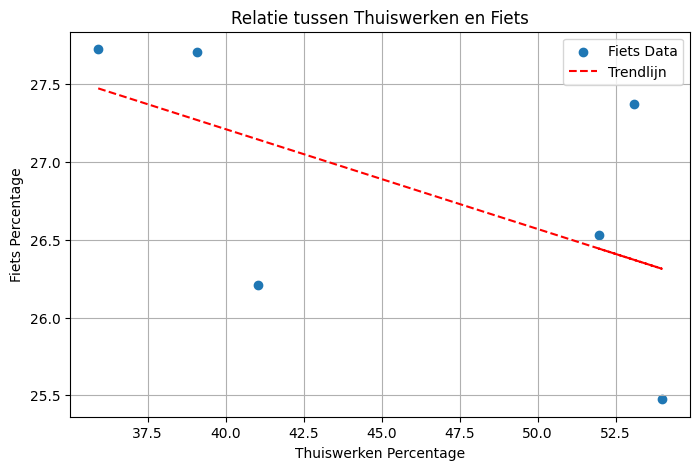


Data for Lopen:
Jaar 2015: Thuiswerken Percentage = 35.91%, Lopen Percentage = 19.80%
Jaar 2019: Thuiswerken Percentage = 39.09%, Lopen Percentage = 19.59%
Jaar 2020: Thuiswerken Percentage = 41.03%, Lopen Percentage = 24.60%
Jaar 2021: Thuiswerken Percentage = 53.98%, Lopen Percentage = 26.24%
Jaar 2022: Thuiswerken Percentage = 53.09%, Lopen Percentage = 24.56%
Jaar 2023: Thuiswerken Percentage = 51.95%, Lopen Percentage = 23.47%


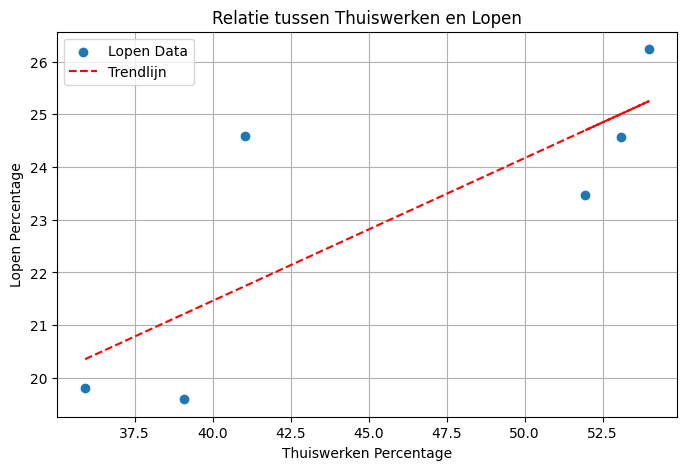


Data for Overige vervoerwijze:
Jaar 2015: Thuiswerken Percentage = 35.91%, Overige vervoerwijze Percentage = 3.30%
Jaar 2019: Thuiswerken Percentage = 39.09%, Overige vervoerwijze Percentage = 3.38%
Jaar 2020: Thuiswerken Percentage = 41.03%, Overige vervoerwijze Percentage = 3.23%
Jaar 2021: Thuiswerken Percentage = 53.98%, Overige vervoerwijze Percentage = 3.42%
Jaar 2022: Thuiswerken Percentage = 53.09%, Overige vervoerwijze Percentage = 3.16%
Jaar 2023: Thuiswerken Percentage = 51.95%, Overige vervoerwijze Percentage = 3.06%


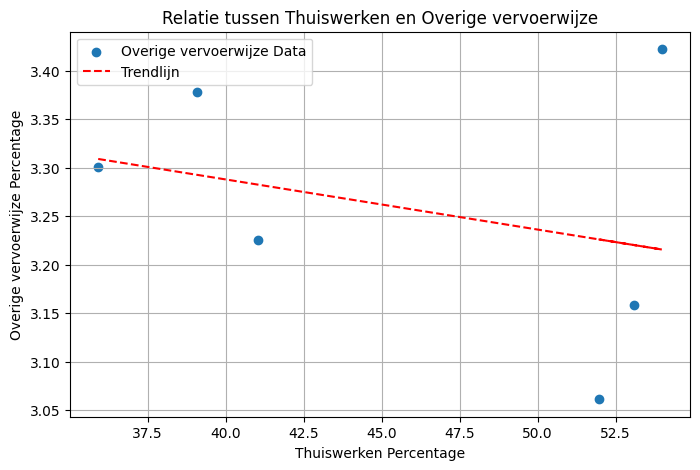


Data for Trein:
Jaar 2015: Thuiswerken Percentage = 35.91%, Trein Percentage = 2.64%
Jaar 2019: Thuiswerken Percentage = 39.09%, Trein Percentage = 2.70%
Jaar 2020: Thuiswerken Percentage = 41.03%, Trein Percentage = 1.61%
Jaar 2021: Thuiswerken Percentage = 53.98%, Trein Percentage = 1.52%
Jaar 2022: Thuiswerken Percentage = 53.09%, Trein Percentage = 1.75%
Jaar 2023: Thuiswerken Percentage = 51.95%, Trein Percentage = 2.38%


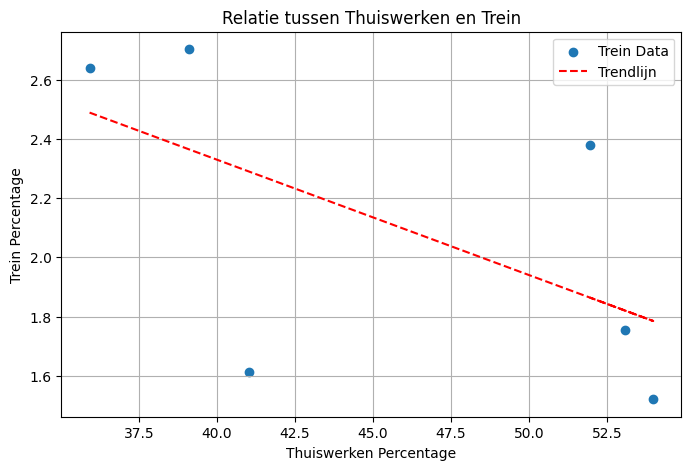


Data for Bus/tram/metro:
Jaar 2015: Thuiswerken Percentage = 35.91%, Bus/tram/metro Percentage = 3.96%
Jaar 2019: Thuiswerken Percentage = 39.09%, Bus/tram/metro Percentage = 4.05%
Jaar 2020: Thuiswerken Percentage = 41.03%, Bus/tram/metro Percentage = 2.42%
Jaar 2021: Thuiswerken Percentage = 53.98%, Bus/tram/metro Percentage = 2.28%
Jaar 2022: Thuiswerken Percentage = 53.09%, Bus/tram/metro Percentage = 2.81%
Jaar 2023: Thuiswerken Percentage = 51.95%, Bus/tram/metro Percentage = 3.40%


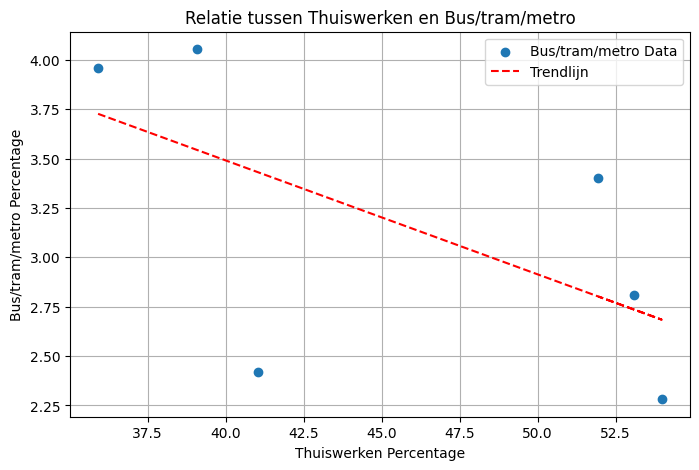


Data for Auto (bestuurder):
Jaar 2015: Thuiswerken Percentage = 35.91%, Auto (bestuurder) Percentage = 31.35%
Jaar 2019: Thuiswerken Percentage = 39.09%, Auto (bestuurder) Percentage = 31.76%
Jaar 2020: Thuiswerken Percentage = 41.03%, Auto (bestuurder) Percentage = 31.85%
Jaar 2021: Thuiswerken Percentage = 53.98%, Auto (bestuurder) Percentage = 30.80%
Jaar 2022: Thuiswerken Percentage = 53.09%, Auto (bestuurder) Percentage = 30.18%
Jaar 2023: Thuiswerken Percentage = 51.95%, Auto (bestuurder) Percentage = 30.61%


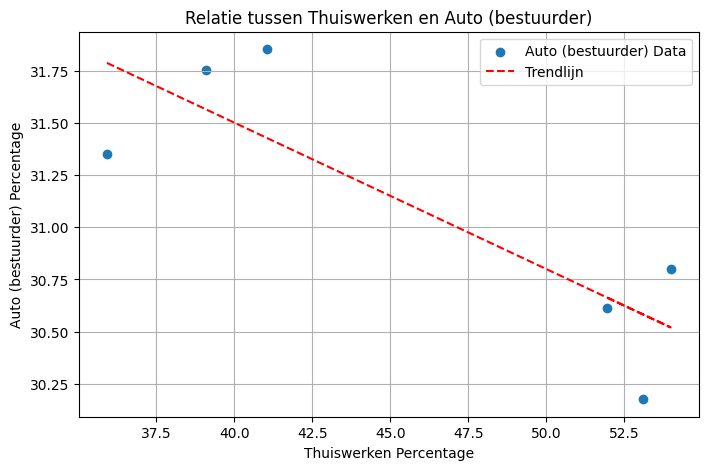

In [58]:
def analyze_transport_vs_homework(df_filtered_agg, df_pct):
    #pivot table "Thuiswerk_Percentage"
    df_pivot = df_filtered_agg.pivot(index='Perioden', columns='Thuiswerker', values='Percentage').fillna(0)
    df_pivot['Thuiswerk_Percentage'] = df_pivot.get('Soms thuiswerken', 0) + df_pivot.get('Meestal thuiswerken', 0)
    df_pivot = df_pivot.reset_index() 
    df_pivot['Perioden'] = df_pivot['Perioden'].astype(str)

    #transport modes
    transport_modes = df_pct['Vervoerwijzen'].unique()
    for transport_mode in transport_modes:
        transport_data = df_pct[df_pct['Vervoerwijzen'] == transport_mode][['Perioden', 'percentage']]
        transport_data['Perioden'] = transport_data['Perioden'].str.replace('*', '', regex=False)
        transport_data['Perioden'] = transport_data['Perioden'].astype(str)
        
        #merge
        merged_data = pd.merge(df_pivot[['Perioden', 'Thuiswerk_Percentage']], transport_data, on='Perioden', how='inner')
        
        #print table
        print(f"\nData for {transport_mode}:")
        for _, row in merged_data.iterrows():
            print(f"Jaar {row['Perioden']}: Thuiswerken Percentage = {row['Thuiswerk_Percentage']:.2f}%, {transport_mode} Percentage = {row['percentage']:.2f}%")
        
        #plot
        plt.figure(figsize=(8, 5))
        plt.scatter(merged_data['Thuiswerk_Percentage'], merged_data['percentage'], label=f"{transport_mode} Data")
        plt.xlabel('Thuiswerken Percentage')
        plt.ylabel(f'{transport_mode} Percentage')
        plt.title(f'Relatie tussen Thuiswerken en {transport_mode}')
        
        #trend line
        z = np.polyfit(merged_data['Thuiswerk_Percentage'], merged_data['percentage'], 1)
        p = np.poly1d(z)
        plt.plot(merged_data['Thuiswerk_Percentage'], p(merged_data['Thuiswerk_Percentage']), "r--", label='Trendlijn')
        
        plt.legend()
        plt.grid(True)
        plt.show()

analyze_transport_vs_homework(df_filtered_agg, df_pct)
